## Libs Used

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.impute import SimpleImputer
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier,VotingClassifier
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score,f1_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

#### Data Loading and EDA

In [3]:
df = pd.read_csv("netflix_customer_churn_with_nulls_labeled.csv")

In [4]:
df.head()

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,TV,8.99,churned,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Mobile,13.99,churned,Gift Card,5,0.03,Sci-Fi
2,4d71f6ce-fca9-4ff7-8afa-197ac24de14b,27,Female,Standard,16.32,10,TV,13.99,not churned,Crypto,2,1.48,Drama
3,d3c72c38-631b-4f9e-8a0e-de103cad1a7d,53,Other,Premium,4.51,12,TV,17.99,churned,Crypto,2,0.35,Horror
4,4e265c34-103a-4dbb-9553-76c9aa47e946,56,Other,Standard,1.89,13,Mobile,13.99,churned,Crypto,2,0.13,Action


In [5]:
df = df.drop(columns = 'customer_id')

In [6]:
df.head()

,age,gender,subscription_type,watch_hours,last_login_days,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51,Other,Basic,14.73,29,TV,8.99,churned,Gift Card,1,0.49,Action
1,47,Other,Standard,0.70,19,Mobile,13.99,churned,Gift Card,5,0.03,Sci-Fi
2,27,Female,Standard,16.32,10,TV,13.99,not churned,Crypto,2,1.48,Drama
3,53,Other,Premium,4.51,12,TV,17.99,churned,Crypto,2,0.35,Horror
4,56,Other,Standard,1.89,13,Mobile,13.99,churned,Crypto,2,0.13,Action


In [7]:
df.describe()

,age,watch_hours,last_login_days,monthly_fee,number_of_profiles,avg_watch_time_per_day
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,43.847400,11.649450,30.089800,13.683400,3.024400,0.874800
std,15.501128,12.014654,17.536078,3.692062,1.415841,2.619824
min,18.000000,0.010000,0.000000,8.990000,1.000000,0.000000
25%,30.000000,3.337500,15.000000,8.990000,2.000000,0.110000
50%,44.000000,8.000000,30.000000,13.990000,3.000000,0.290000
75%,58.000000,16.030000,45.000000,17.990000,4.000000,0.720000
max,70.000000,110.400000,60.000000,17.990000,5.000000,98.420000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     5000 non-null   int64  
 1   gender                  5000 non-null   object 
 2   subscription_type       4500 non-null   object 
 3   watch_hours             5000 non-null   float64
 4   last_login_days         5000 non-null   int64  
 5   device                  4500 non-null   object 
 6   monthly_fee             5000 non-null   float64
 7   churned                 5000 non-null   object 
 8   payment_method          4500 non-null   object 
 9   number_of_profiles      5000 non-null   int64  
 10  avg_watch_time_per_day  5000 non-null   float64
 11  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(3), object(6)
memory usage: 468.9+ KB


In [9]:
df.isnull().sum()

age                         0
gender                      0
subscription_type         500
watch_hours                 0
last_login_days             0
device                    500
monthly_fee                 0
churned                     0
payment_method            500
number_of_profiles          0
avg_watch_time_per_day      0
favorite_genre              0
dtype: int64

In [10]:
# sns.heatmap(df.corr(numeric_only=True), annot=True)
# plt.title("Coorelation Heatmap")
# plt.show()

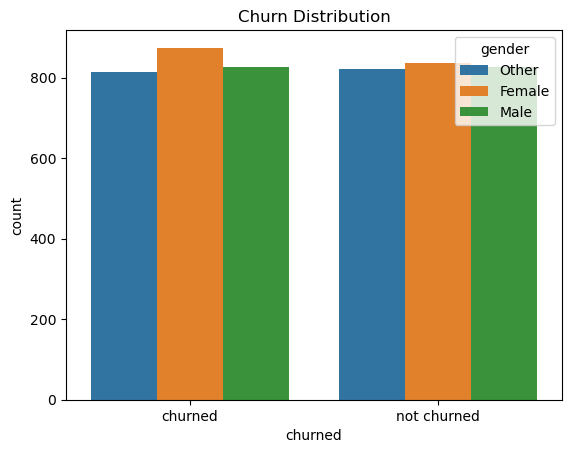

In [11]:
sns.countplot(x='churned', data=df,hue = 'gender')
plt.title("Churn Distribution")
plt.show()

In [12]:
churned_rate = df['churned'].value_counts(normalize=True)
print("Churn Distribution:\n", churned_rate*100)

Churn Distribution:
 churned
churned        50.3
not churned    49.7
Name: proportion, dtype: float64


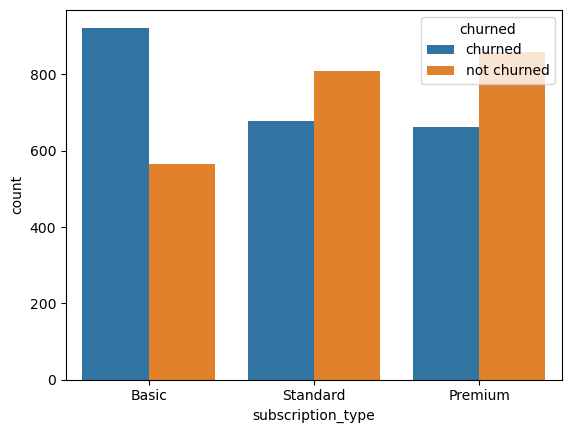

In [13]:
sns.countplot(data=df, x='subscription_type', hue='churned')
plt.show()

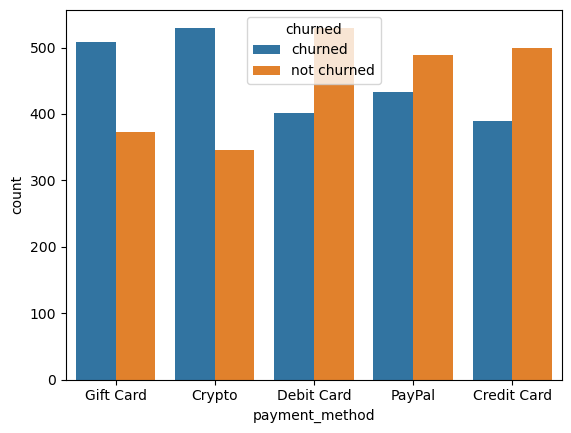

In [14]:
sns.countplot(data=df, x='payment_method', hue='churned')
plt.show()

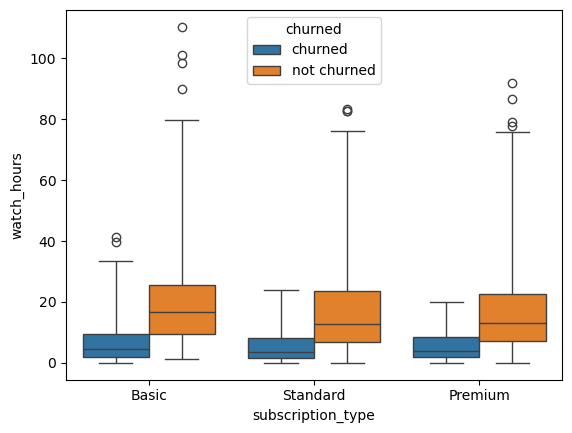

In [15]:
sns.boxplot(data=df, x='subscription_type', y='watch_hours',hue = 'churned',whis = 3.5)
plt.show()

In [16]:
df = df[df['avg_watch_time_per_day'] <= 24]
df['watch_hours'] = df['watch_hours'].clip(upper=df['watch_hours'].quantile(0.997))

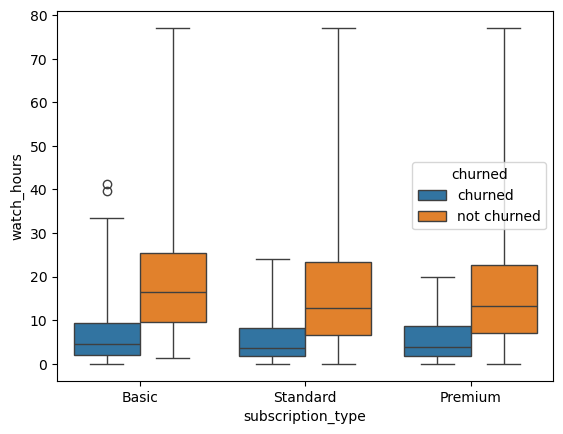

In [17]:
sns.boxplot(data=df, x='subscription_type', y='watch_hours',hue = 'churned',whis = 3.5)
plt.show()

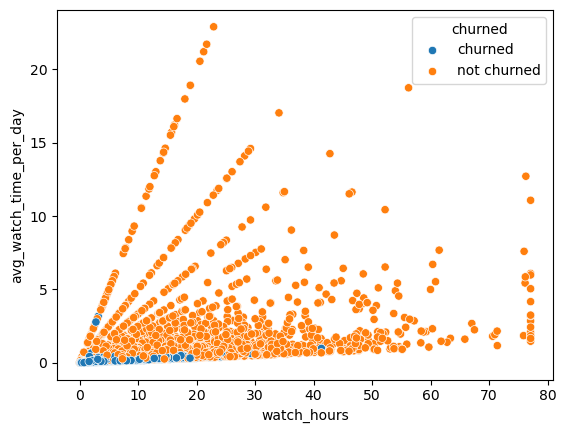

In [18]:
sns.scatterplot(x = 'watch_hours',y='avg_watch_time_per_day',hue = 'churned',data = df)
plt.show()

### Data Prprocesssing and Feature Pipelining

In [19]:
def missing_values(df):
    impu_df = df.copy()
    imputers = {}
    for col in impu_df.columns:
        if impu_df[col].dtype in ['int64','float64']:
            imp = SimpleImputer(strategy="mean")
        else:
            imp = SimpleImputer(strategy="most_frequent")

        impu_df[col] = imp.fit_transform(impu_df[[col]]).ravel()
        imputers[col] = imp
    
    return impu_df,imputers

In [20]:
impu_df, imputers = missing_values(df)
print(imputers)

{'age': SimpleImputer(), 'gender': SimpleImputer(strategy='most_frequent'), 'subscription_type': SimpleImputer(strategy='most_frequent'), 'watch_hours': SimpleImputer(), 'last_login_days': SimpleImputer(), 'device': SimpleImputer(strategy='most_frequent'), 'monthly_fee': SimpleImputer(), 'churned': SimpleImputer(strategy='most_frequent'), 'payment_method': SimpleImputer(strategy='most_frequent'), 'number_of_profiles': SimpleImputer(), 'avg_watch_time_per_day': SimpleImputer(), 'favorite_genre': SimpleImputer(strategy='most_frequent')}


In [21]:
impu_df.isnull().sum()

age                       0
gender                    0
subscription_type         0
watch_hours               0
last_login_days           0
device                    0
monthly_fee               0
churned                   0
payment_method            0
number_of_profiles        0
avg_watch_time_per_day    0
favorite_genre            0
dtype: int64

In [22]:
impu_df.head()

,age,gender,subscription_type,watch_hours,last_login_days,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51.0,Other,Basic,14.73,29.0,TV,8.99,churned,Gift Card,1.0,0.49,Action
1,47.0,Other,Standard,0.70,19.0,Mobile,13.99,churned,Gift Card,5.0,0.03,Sci-Fi
2,27.0,Female,Standard,16.32,10.0,TV,13.99,not churned,Crypto,2.0,1.48,Drama
3,53.0,Other,Premium,4.51,12.0,TV,17.99,churned,Crypto,2.0,0.35,Horror
4,56.0,Other,Standard,1.89,13.0,Mobile,13.99,churned,Crypto,2.0,0.13,Action


In [23]:
# joblib.dump(imputers, "imputers.joblib")

In [24]:
def enco(df):

    df_encoded = df.copy()
    encoders = {}
    
    for col in df_encoded.columns:
        if df_encoded[col].dtype not in ['int64', 'float64']:
                    enc_ord = OrdinalEncoder()
                    df_encoded[col] = enc_ord.fit_transform(df_encoded[[col]])
                    encoders[col] = enc_ord
    
    return df_encoded, encoders


In [25]:
enc_df, encoders = enco(impu_df) 
enc_df.head()

,age,gender,subscription_type,watch_hours,last_login_days,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,51.0,2.0,0.0,14.73,29.0,3.0,8.99,0.0,3.0,1.0,0.49,0.0
1,47.0,2.0,2.0,0.70,19.0,2.0,13.99,0.0,3.0,5.0,0.03,6.0
2,27.0,0.0,2.0,16.32,10.0,3.0,13.99,1.0,1.0,2.0,1.48,3.0
3,53.0,2.0,1.0,4.51,12.0,3.0,17.99,0.0,1.0,2.0,0.35,4.0
4,56.0,2.0,2.0,1.89,13.0,2.0,13.99,0.0,1.0,2.0,0.13,0.0


In [26]:
print(encoders)

{'gender': OrdinalEncoder(), 'subscription_type': OrdinalEncoder(), 'device': OrdinalEncoder(), 'churned': OrdinalEncoder(), 'payment_method': OrdinalEncoder(), 'favorite_genre': OrdinalEncoder()}


In [27]:
enc_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4990 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   age                     4990 non-null   float64
 1   gender                  4990 non-null   float64
 2   subscription_type       4990 non-null   float64
 3   watch_hours             4990 non-null   float64
 4   last_login_days         4990 non-null   float64
 5   device                  4990 non-null   float64
 6   monthly_fee             4990 non-null   float64
 7   churned                 4990 non-null   float64
 8   payment_method          4990 non-null   float64
 9   number_of_profiles      4990 non-null   float64
 10  avg_watch_time_per_day  4990 non-null   float64
 11  favorite_genre          4990 non-null   float64
dtypes: float64(12)
memory usage: 506.8 KB


In [28]:
# joblib.dump(encoders, "encoders.joblib")
# joblib.dump(enc_df.columns.tolist(), "feature_columns.joblib")


In [29]:
def vali_curve_plot(model,X,y,param_name,param_range,cv=5,scoring='accuracy',title=''):
    train_scores, val_scores = validation_curve(model,X,y,param_name=param_name,param_range=param_range,cv=cv,scoring=scoring,n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    val_mean = np.mean(val_scores, axis=1)

    plt.figure(figsize=(8, 5))
    plt.plot(param_range, train_mean, label='Training Score', marker='o')
    plt.plot(param_range, val_mean, label='Validation Score', marker='o')
    plt.xlabel(param_name)
    plt.ylabel(scoring)
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

In [30]:
X = enc_df.drop(columns=["churned"])
y = enc_df["churned"]

In [31]:
X.shape

(4990, 11)

In [32]:
y.shape

(4990,)

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size =0.2 , random_state= 42)

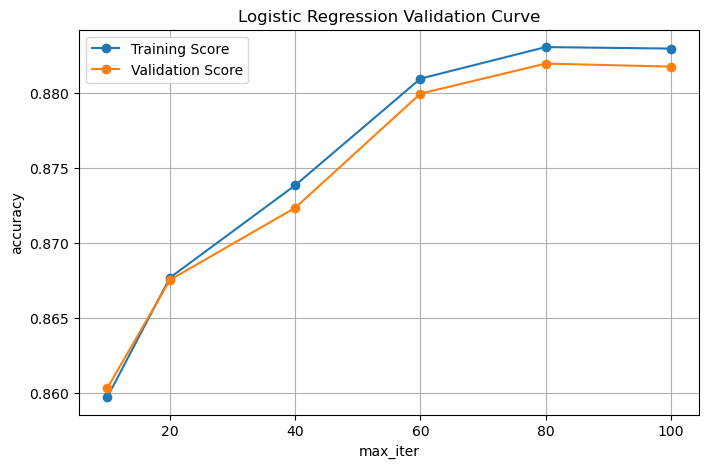

In [34]:
vali_curve_plot(
    model=LogisticRegression(),
    X=X,
    y=y,
    param_name='max_iter',
    param_range=[10, 20, 40, 60, 80, 100],
    title='Logistic Regression Validation Curve'
)

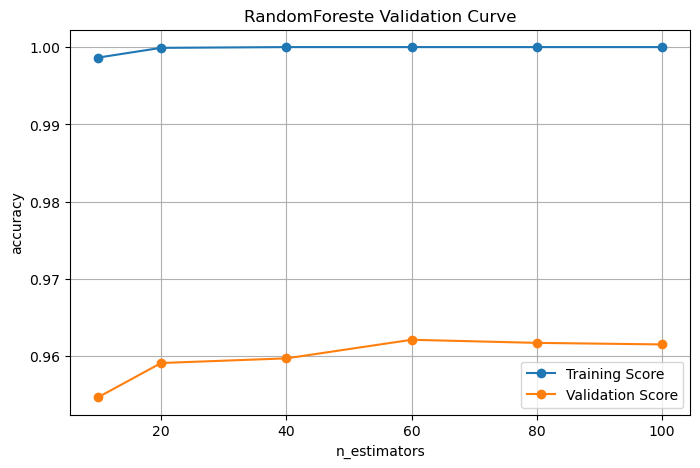

In [35]:
vali_curve_plot(
    model=RandomForestClassifier(random_state=42),
    X=X,
    y=y,
    param_name='n_estimators',
    param_range=[10, 20, 40, 60, 80, 100],
    title='RandomForeste Validation Curve'
)

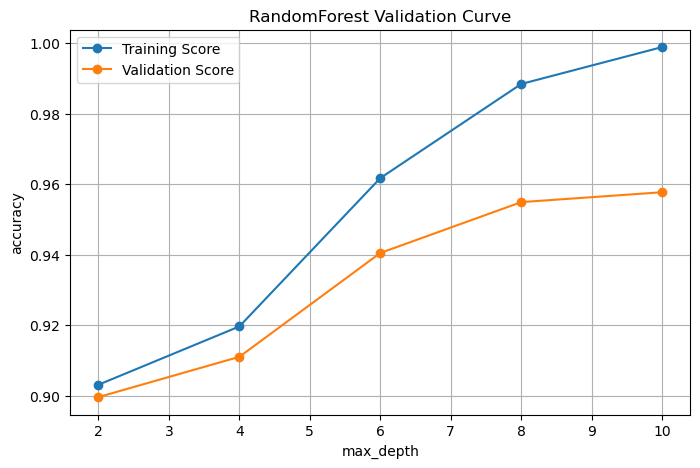

In [36]:
vali_curve_plot(
    model=RandomForestClassifier(random_state=42),
    X=X,
    y=y,
    param_name='max_depth',
    param_range=[2,4,6,8,10],
    title='RandomForest Validation Curve'
)

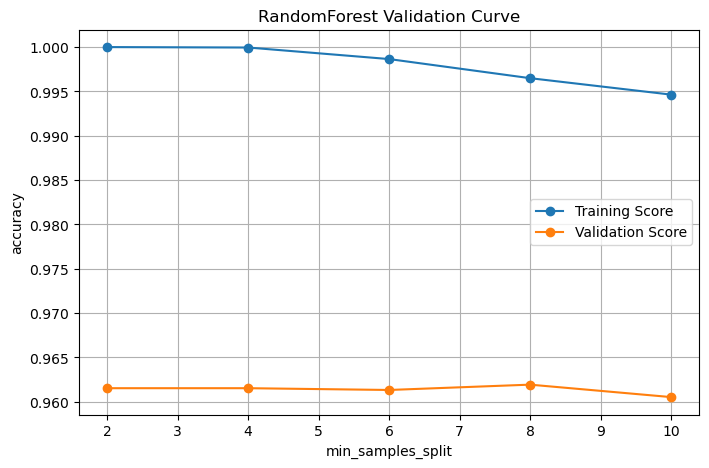

In [37]:
vali_curve_plot(
    model=RandomForestClassifier(random_state=42),
    X=X,
    y=y,
    param_name='min_samples_split',
    param_range=[2,4,6,8,10],
    title='RandomForest Validation Curve'
)

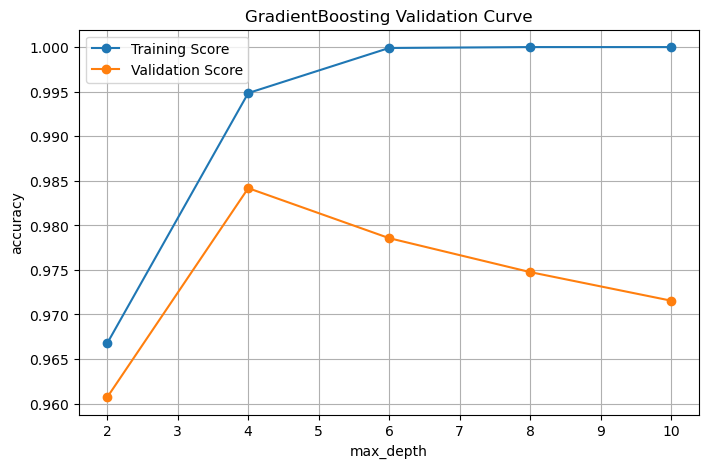

In [38]:
vali_curve_plot(
    model=GradientBoostingClassifier(random_state=42),
    X=X,
    y=y,
    param_name='max_depth',
    param_range=[2,4,6,8,10],
    title='GradientBoosting Validation Curve'
)

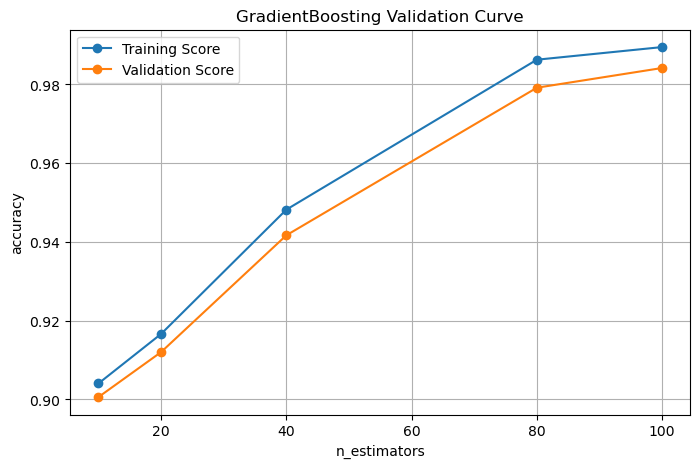

In [39]:
vali_curve_plot(
    model=GradientBoostingClassifier(random_state=42),
    X=X,
    y=y,
    param_name='n_estimators',
    param_range=[10,20,40,80,100],
    title='GradientBoosting Validation Curve'
)

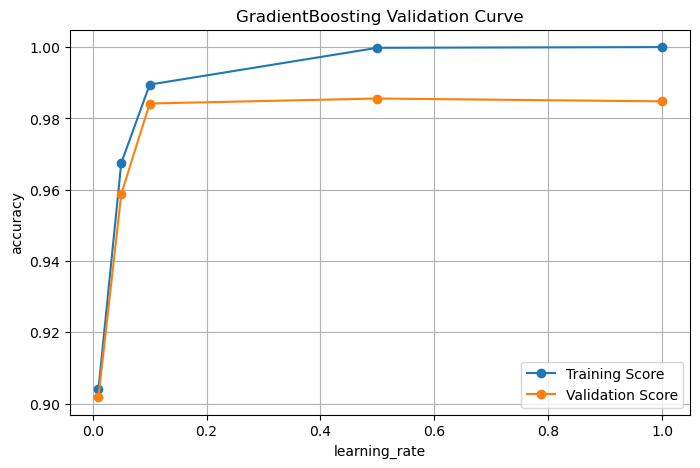

In [40]:
vali_curve_plot(
    model=GradientBoostingClassifier(random_state=42),
    X=X,
    y=y,
    param_name='learning_rate',
    param_range=[0.01,0.05,0.1,0.5,1,],
    title='GradientBoosting Validation Curve'
)

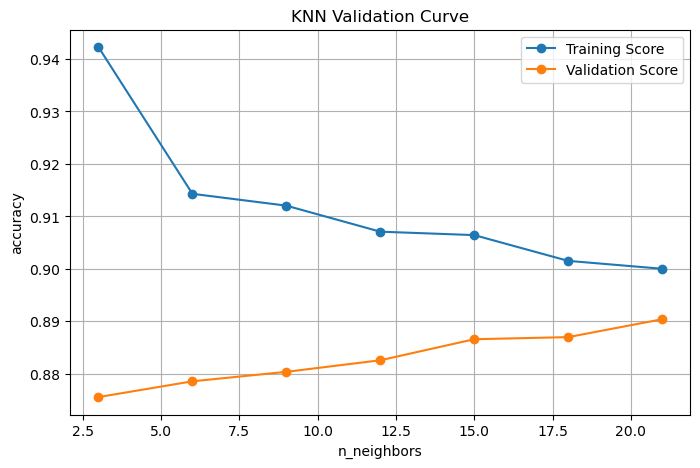

In [41]:
vali_curve_plot(
    model=KNeighborsClassifier(),
    X=X,
    y=y,
    param_name='n_neighbors',
    param_range=[3,6,9,12,15,18,21],
    title='KNN Validation Curve'
)

#### Model Training

#### Base Learners

In [42]:
lg_reg = LogisticRegression(max_iter = 80)
lg_reg.fit(X_train, y_train)

rdf = RandomForestClassifier(n_estimators=60,max_depth=8,min_samples_split=8,random_state=42)
rdf.fit(X_train, y_train)

gtb = GradientBoostingClassifier(n_estimators = 80,max_depth = 4,min_samples_split = 0.1,learning_rate=0.5,random_state=42)
gtb.fit(X_train, y_train)


knn = KNeighborsClassifier(n_neighbors=21)
knn.fit(X_train, y_train)


gnb = GaussianNB()
gnb.fit(X_train, y_train)


GaussianNB()

#### Accurecy,Confusion Matrix,Precision,Recall,F1 Score of Base Learners

In [43]:
y_pred_lg = lg_reg.predict(X_test)
cm_lg = confusion_matrix(y_test, y_pred_lg)
precision_lg = precision_score(y_test, y_pred_lg)
recall_lg = recall_score(y_test, y_pred_lg)
f1_lg = f1_score(y_test, y_pred_lg)
print(f"Logistic Regression Accuracy:{accuracy_score(y_test, y_pred_lg)*100:.2f}%")
print(f"Confusion Matrix for Logistic Regression:\n{cm_lg}")
print(f"Precision: {precision_lg*100:.2f}%")
print(f"Recall: {recall_lg*100:.2f}%")
print(f"F1 Score: {f1_lg*100:.2f}%\n")
print()

y_pred_rdf = rdf.predict(X_test)
cm_rdf = confusion_matrix(y_test, y_pred_rdf)
precision_rdf = precision_score(y_test, y_pred_rdf)
recall_rdf = recall_score(y_test, y_pred_rdf)
f1_rdf = f1_score(y_test, y_pred_rdf)
print(f"Random Forest Accuracy:{accuracy_score(y_test, y_pred_rdf)*100:.2f}%")
print(f"Confusion Matrix for Random Forest:\n{cm_rdf}")
print(f"Precision: {precision_rdf*100:.2f}%")
print(f"Recall: {recall_rdf*100:.2f}%")
print(f"F1 Score: {f1_rdf*100:.2f}%\n")
print()

y_pred_gtb = gtb.predict(X_test)
cm_gtb = confusion_matrix(y_test, y_pred_gtb)
precision_gtb = precision_score(y_test, y_pred_gtb)
recall_gtb = recall_score(y_test, y_pred_gtb)
f1_gtb = f1_score(y_test, y_pred_gtb)
print(f"Gradient Boosting Accuracy:{accuracy_score(y_test, y_pred_gtb)*100:.2f}%")
print(f"Confusion Matrix for Gradient Boosting:\n{cm_gtb}")
print(f"Precision: {precision_gtb*100:.2f}%")
print(f"Recall: {recall_gtb*100:.2f}%")
print(f"F1 Score: {f1_gtb*100:.2f}%\n")
print()

y_pred_knn = knn.predict(X_test)
cm_knn = confusion_matrix(y_test, y_pred_knn)
precision_knn = precision_score(y_test, y_pred_knn)
recall_knn = recall_score(y_test, y_pred_knn)
f1_knn = f1_score(y_test, y_pred_knn)
print(f"KNN Accuracy:{accuracy_score(y_test, y_pred_knn)*100:.2f}%")
print(f"Confusion Matrix for KNN:\n{cm_knn}")
print(f"Precision: {precision_knn*100:.2f}%")
print(f"Recall: {recall_knn*100:.2f}%")
print(f"F1 Score: {f1_knn*100:.2f}%\n")
print()

y_pred_gnb = gnb.predict(X_test)
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
precision_gnb = precision_score(y_test, y_pred_gnb)
recall_gnb = recall_score(y_test, y_pred_gnb)
f1_gnb = f1_score(y_test, y_pred_gnb)
print(f"Naive Bayes Accuracy:{accuracy_score(y_test, y_pred_gnb)*100:.2f}%")
print(f"Confusion Matrix for Naive Bias:\n{cm_gnb}")
print(f"Precision: {precision_gnb*100:.2f}%")
print(f"Recall: {recall_gnb*100:.2f}%")
print(f"F1 Score: {f1_gnb*100:.2f}%\n")
print()

Logistic Regression Accuracy:89.48%
Confusion Matrix for Logistic Regression:
[[481  56]
 [ 49 412]]
Precision: 88.03%
Recall: 89.37%
F1 Score: 88.70%


Random Forest Accuracy:95.69%
Confusion Matrix for Random Forest:
[[507  30]
 [ 13 448]]
Precision: 93.72%
Recall: 97.18%
F1 Score: 95.42%


Gradient Boosting Accuracy:98.30%
Confusion Matrix for Gradient Boosting:
[[525  12]
 [  5 456]]
Precision: 97.44%
Recall: 98.92%
F1 Score: 98.17%


KNN Accuracy:89.08%
Confusion Matrix for KNN:
[[486  51]
 [ 58 403]]
Precision: 88.77%
Recall: 87.42%
F1 Score: 88.09%


Naive Bayes Accuracy:83.77%
Confusion Matrix for Naive Bias:
[[519  18]
 [144 317]]
Precision: 94.63%
Recall: 68.76%
F1 Score: 79.65%




#### Ensembled Voting classifier

In [44]:
voting_clf = VotingClassifier(
    estimators=[
        ('lg_reg', lg_reg),
        ('rdf', rdf),
        ('gtb', gtb),
        ('knn', knn),
        ('gnb', gnb)
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lg_reg', LogisticRegression(max_iter=80)),
                             ('rdf',
                              RandomForestClassifier(max_depth=8,
                                                     min_samples_split=8,
                                                     n_estimators=60,
                                                     random_state=42)),
                             ('gtb',
                              GradientBoostingClassifier(learning_rate=0.5,
                                                         max_depth=4,
                                                         min_samples_split=0.1,
                                                         n_estimators=80,
                                                         random_state=42)),
                             ('knn', KNeighborsClassifier(n_neighbors=21)),
                             ('gnb', GaussianNB())],
                 voting='soft')

#### Training Accuracy

In [45]:
y_train_pred_vt = voting_clf.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred_vt)
print(f"Voting Classifier Training Accuracy: {(train_accuracy)*100:.2f}%")

Voting Classifier Training Accuracy: 95.82%


#### Accurecy,Confusion Matrix,Precision,Recall,F1 Score of Ensembled Model

In [46]:
y_test_pred_vt = voting_clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred_vt)
precision = precision_score(y_test, y_test_pred_vt)
recall = recall_score(y_test, y_test_pred_vt)
f1 = f1_score(y_test, y_test_pred_vt)
print(f"Voting Classifier Accuracy:{accuracy_score(y_test, y_test_pred_vt)*100:.2f}%")
print(f"Confusion Matrix for Voting Classifier:\n{cm}")
print(f"Precision: {precision*100:.2f}%")
print(f"Recall: {recall*100:.2f}%")
print(f"F1 Score: {f1*100:.2f}%\n")

Voting Classifier Accuracy:94.39%
Confusion Matrix for Voting Classifier:
[[520  17]
 [ 39 422]]
Precision: 96.13%
Recall: 91.54%
F1 Score: 93.78%



In [47]:
# joblib.dump(voting_clf, 'voting_classifier_model.joblib')